<a href="https://colab.research.google.com/github/Sreyas2403/StockAnalysis_Patterns-Indicators/blob/main/MACd%3E%3CSignaland0_Assign7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nsepython

In [ ]:
from nsepython import *
print(indices)

['NIFTY', 'FINNIFTY', 'BANKNIFTY']


In [ ]:
import nsepython
import pandas
symbol = 'SBIN'
series = 'EQ'
start_date = '01-01-2023'
end_date = '31-12-2023'
equity_data = equity_history(symbol, series, start_date, end_date)
print(equity_data)

                          _id CH_SYMBOL CH_SERIES CH_MARKET_TYPE  \
0    658c11ff3dcac5b895a9ab2a      SBIN        EQ              N   
1    658d637e55a5f96115c518a5      SBIN        EQ              N   
2    658eb4ff59ecfd0253b31b8f      SBIN        EQ              N   
3    655755ffe1720fcb41e49b03      SBIN        EQ              N   
4    655b4a7e3f0ac524236969fe      SBIN        EQ              N   
..                        ...       ...       ...            ...   
247  63e0ebfee9486e000641a74e      SBIN        EQ              N   
248  63e23d7e9029740006c92280      SBIN        EQ              N   
249  63e38edb77e63d0007d9b91b      SBIN        EQ              N   
250  63e4e0621df6cc0007b3d3dd      SBIN        EQ              N   
251  642835e7faf76300072ef1db      SBIN        EQ              N   

     CH_TRADE_HIGH_PRICE  CH_TRADE_LOW_PRICE  CH_OPENING_PRICE  \
0                 649.45              639.00            640.75   
1                 653.30              646.50       

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=176d5b6643e1fb3eea4c73111479f4a26190e60ec0224bd60be503b73379ff6a
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


01-01-2023
31-12-2023
Analysis results have been saved to SBIN_MACD_RSI_analysis.xlsx
Dates when MACD is below Signal and below 0-line and RSI >= 40:
218   2023-03-16
219   2023-03-17
220   2023-03-20
221   2023-03-21
222   2023-03-22
171   2023-03-22
172   2023-03-23
173   2023-03-24
174   2023-03-27
175   2023-03-28
176   2023-03-29
119   2023-06-19
120   2023-06-20
121   2023-06-21
122   2023-06-22
123   2023-06-23
124   2023-06-26
125   2023-06-27
126   2023-06-28
127   2023-06-30
99    2023-08-08
100   2023-08-09
101   2023-08-10
102   2023-08-11
103   2023-08-14
104   2023-08-16
105   2023-08-17
106   2023-08-18
107   2023-08-21
108   2023-08-22
109   2023-08-23
110   2023-08-24
111   2023-08-25
61    2023-08-31
34    2023-10-13
35    2023-10-16
36    2023-10-17
37    2023-10-18
38    2023-10-19
39    2023-10-20
40    2023-10-23
41    2023-10-25
42    2023-10-26
43    2023-10-27
44    2023-10-30
45    2023-10-31
46    2023-11-01
58    2023-11-17
4     2023-11-20
5     2023-11-21


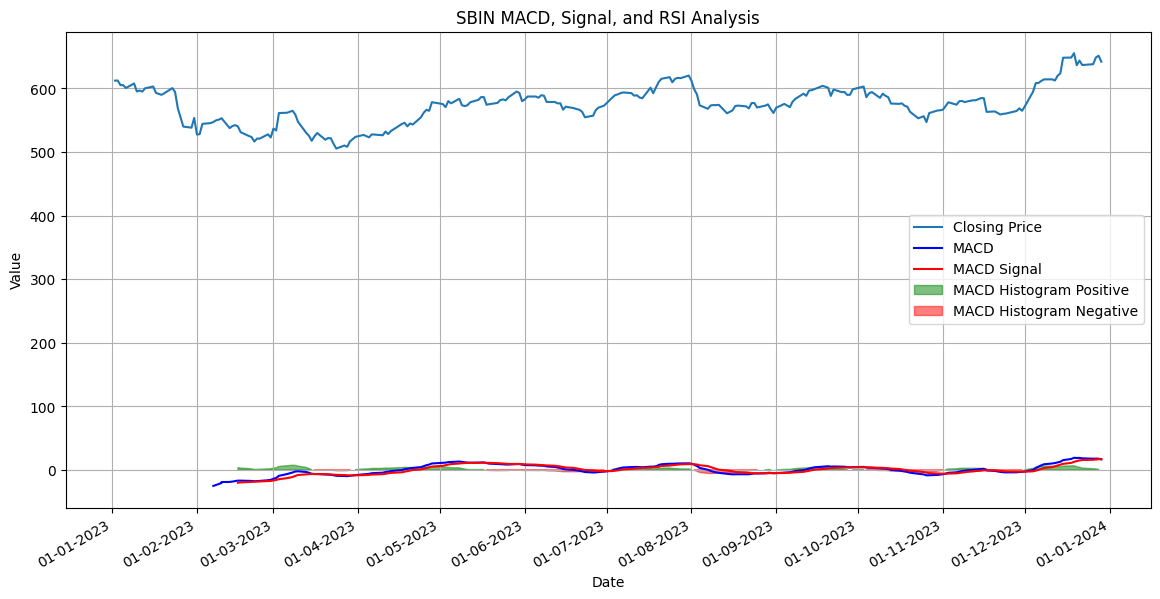

In [ ]:
# Filter the data where MACD is below the Signal line and below the 0-line
import pandas as pd
import nsepython as nse
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define symbol and series
symbol = input()
series = "EQ"

# Define start date and end date
start_date = input()
end_date = input()

# Fetch equity history
equity_data = nse.equity_history(symbol, series, start_date, end_date)

# Convert data to DataFrame
data = pd.DataFrame(equity_data)
data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
data = data.sort_values(by='mTIMESTAMP')

# Convert necessary columns to numeric
data['CH_CLOSING_PRICE'] = pd.to_numeric(data['CH_CLOSING_PRICE'], errors='coerce')
data['CH_TOT_TRADED_QTY'] = pd.to_numeric(data['CH_TOT_TRADED_QTY'], errors='coerce')

# Drop rows with NaN values in key columns after conversion
data = data.dropna(subset=['CH_CLOSING_PRICE', 'CH_TOT_TRADED_QTY'])

# Calculate MACD and MACD signal line
macd = ta.macd(data['CH_CLOSING_PRICE'], fast=12, slow=26, signal=9)
data['MACD'] = macd['MACD_12_26_9']
data['Signal'] = macd['MACDs_12_26_9']

# Calculate RSI
data['RSI'] = ta.rsi(data['CH_CLOSING_PRICE'], length=14)

# Calculate the gap between MACD and Signal line
data['MACD_Gap'] = data['MACD'] - data['Signal']
print(data['MACD_Gap'])

# Filter the data where MACD is below the Signal line and below the 0-line
filtered_data = data[(data['MACD'] < data['Signal']) & (data['MACD'] < 0) ]

# Get the required dates and histogram values
required_dates = filtered_data['mTIMESTAMP']
histogram_values = filtered_data['MACD_Gap']

# Save the results to an Excel file
output_file = 'SBIN_MACD_RSI_analysis.xlsx'
with pd.ExcelWriter(output_file) as writer:
    data.to_excel(writer, sheet_name='Full Data', index=False)
    filtered_data.to_excel(writer, sheet_name='Filtered Data', index=False)
print(f"Analysis results have been saved to {output_file}")

# Print the dates and histogram values
print("Dates when MACD is below Signal and below 0-line")
print(required_dates)
print("\nHistogram values for those dates:")
print(histogram_values)

# Optionally, plot the data
plt.figure(figsize=(14, 7))
plt.plot(data['mTIMESTAMP'], data['CH_CLOSING_PRICE'], label='Closing Price', color = 'black')
plt.plot(data['mTIMESTAMP'], data['MACD'], label='MACD', color='blue')
plt.plot(data['mTIMESTAMP'], data['Signal'], label='MACD Signal', color='yellow')
plt.fill_between(data['mTIMESTAMP'], data['MACD_Gap'], where=(data['MACD_Gap'] > 0), color='green', alpha=0.5, label='MACD Histogram Positive')
plt.fill_between(data['mTIMESTAMP'], data['MACD_Gap'], where=(data['MACD_Gap'] < 0), color='red', alpha=0.5, label='MACD Histogram Negative')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'{symbol} MACD, Signal, and RSI Analysis')
plt.legend()
plt.grid()

# Formatting date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()


01-01-2023
31-12-2023
{'data': [{'_id': '642835e7faf76300072ef1db', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 557.25, 'CH_TRADE_LOW_PRICE': 546.5, 'CH_OPENING_PRICE': 546.5, 'CH_CLOSING_PRICE': 553.05, 'CH_LAST_TRADED_PRICE': 552.9, 'CH_PREVIOUS_CLS_PRICE': 550.8, 'CH_TOT_TRADED_QTY': 13824475, 'CH_TOT_TRADED_VAL': 7656154646.75, 'CH_52WEEK_HIGH_PRICE': 629.55, 'CH_52WEEK_LOW_PRICE': 425, 'CH_TOTAL_TRADES': 179516, 'CH_ISIN': 'INE062A01020', 'CH_TIMESTAMP': '2023-02-10', 'TIMESTAMP': '2023-02-09T18:30:00.000Z', 'createdAt': '2023-04-01T13:47:19.650Z', 'updatedAt': '2023-04-01T13:47:19.650Z', '__v': 0, 'SLBMH_TOT_VAL': None, 'VWAP': 553.81, 'mTIMESTAMP': '10-Feb-2023'}, {'_id': '63e4e0621df6cc0007b3d3dd', 'CH_SYMBOL': 'SBIN', 'CH_SERIES': 'EQ', 'CH_MARKET_TYPE': 'N', 'CH_TRADE_HIGH_PRICE': 552, 'CH_TRADE_LOW_PRICE': 542.8, 'CH_OPENING_PRICE': 552, 'CH_CLOSING_PRICE': 550.8, 'CH_LAST_TRADED_PRICE': 551, 'CH_PREVIOUS_CLS_PRICE': 549.75, 'CH_TOT_

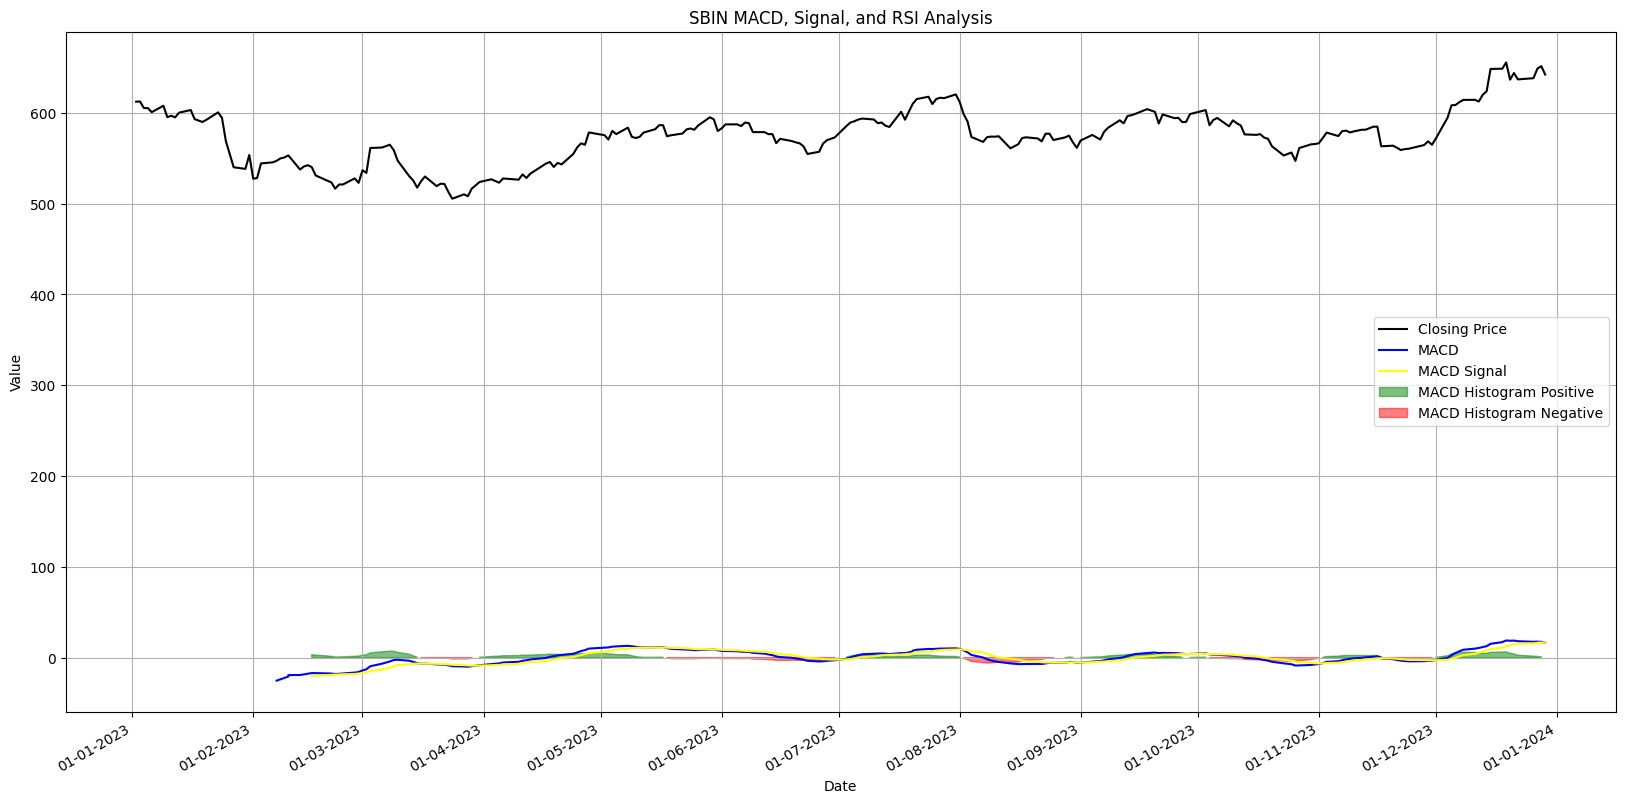

In [ ]:
# Filter the data where MACD is below the Signal line and below the 0-line
import pandas as pd
import nsepython as nse
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define symbol and series
symbol = input()
series = "EQ"

# Define start date and end date
start_date = input()
end_date = input()

# Fetch equity history
equity_data = nse.equity_history(symbol, series, start_date, end_date)

# Convert data to DataFrame
data = pd.DataFrame(equity_data)
data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
data = data.sort_values(by='mTIMESTAMP')

# Convert necessary columns to numeric
data['CH_CLOSING_PRICE'] = pd.to_numeric(data['CH_CLOSING_PRICE'], errors='coerce')
data['CH_TOT_TRADED_QTY'] = pd.to_numeric(data['CH_TOT_TRADED_QTY'], errors='coerce')

# Drop rows with NaN values in key columns after conversion
data = data.dropna(subset=['CH_CLOSING_PRICE', 'CH_TOT_TRADED_QTY'])

# Calculate MACD and MACD signal line
macd = ta.macd(data['CH_CLOSING_PRICE'], fast=12, slow=26, signal=9)
data['MACD'] = macd['MACD_12_26_9']
data['Signal'] = macd['MACDs_12_26_9']

# Calculate RSI
data['RSI'] = ta.rsi(data['CH_CLOSING_PRICE'], length=14)

# Calculate the gap between MACD and Signal line
data['MACD_Gap'] = data['MACD'] - data['Signal']
print(data['MACD_Gap'])

# Filter the data where MACD is below the Signal line and below the 0-line
filtered_data = data[(data['MACD'] > data['Signal']) & (data['MACD'] > 0) ]

# Get the required dates and histogram values
required_dates = filtered_data['mTIMESTAMP']
histogram_values = filtered_data['MACD_Gap']

# Save the results to an Excel file
output_file = 'SBIN_MACD_RSI_analysis.xlsx'
with pd.ExcelWriter(output_file) as writer:
    data.to_excel(writer, sheet_name='Full Data', index=False)
    filtered_data.to_excel(writer, sheet_name='Filtered Data', index=False)
print(f"Analysis results have been saved to {output_file}")

# Print the dates and histogram values
print("Dates when MACD is above Signal and abovd 0-line")
print(required_dates)
print("\nHistogram values for those dates:")
print(histogram_values)

# Optionally, plot the data
plt.figure(figsize=(20, 10))
plt.plot(data['mTIMESTAMP'], data['CH_CLOSING_PRICE'], label='Closing Price', color = 'black')
plt.plot(data['mTIMESTAMP'], data['MACD'], label='MACD', color='blue')
plt.plot(data['mTIMESTAMP'], data['Signal'], label='MACD Signal', color='yellow')
plt.fill_between(data['mTIMESTAMP'], data['MACD_Gap'], where=(data['MACD_Gap'] > 0), color='green', alpha=0.5, label='MACD Histogram Positive')
plt.fill_between(data['mTIMESTAMP'], data['MACD_Gap'], where=(data['MACD_Gap'] < 0), color='red', alpha=0.5, label='MACD Histogram Negative')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'{symbol} MACD, Signal, and RSI Analysis')
plt.legend()
plt.grid()

# Formatting date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()


01-01-2023
31-12-2023
223         NaN
224         NaN
225         NaN
226         NaN
227         NaN
         ...   
28     1.638691
29     1.431076
0      1.078658
1      0.833378
2     -0.112368
Name: MACD_Gap, Length: 252, dtype: float64
Analysis results have been saved to SBIN_MACD_RSI_above0_belowsignal.xlsx
Dates when MACD is below Signal and above 0-line
154   2023-05-18
155   2023-05-19
156   2023-05-22
157   2023-05-23
158   2023-05-24
159   2023-05-25
160   2023-05-26
161   2023-05-29
162   2023-05-30
163   2023-05-31
164   2023-06-01
165   2023-06-02
166   2023-06-05
167   2023-06-06
168   2023-06-07
169   2023-06-08
170   2023-06-09
114   2023-06-12
115   2023-06-13
116   2023-06-14
117   2023-06-15
118   2023-06-16
95    2023-08-02
96    2023-08-03
97    2023-08-04
98    2023-08-07
80    2023-09-28
83    2023-10-04
84    2023-10-05
85    2023-10-06
30    2023-10-09
31    2023-10-10
32    2023-10-11
33    2023-10-12
2     2023-12-29
Name: mTIMESTAMP, dtype: datetime64[ns]


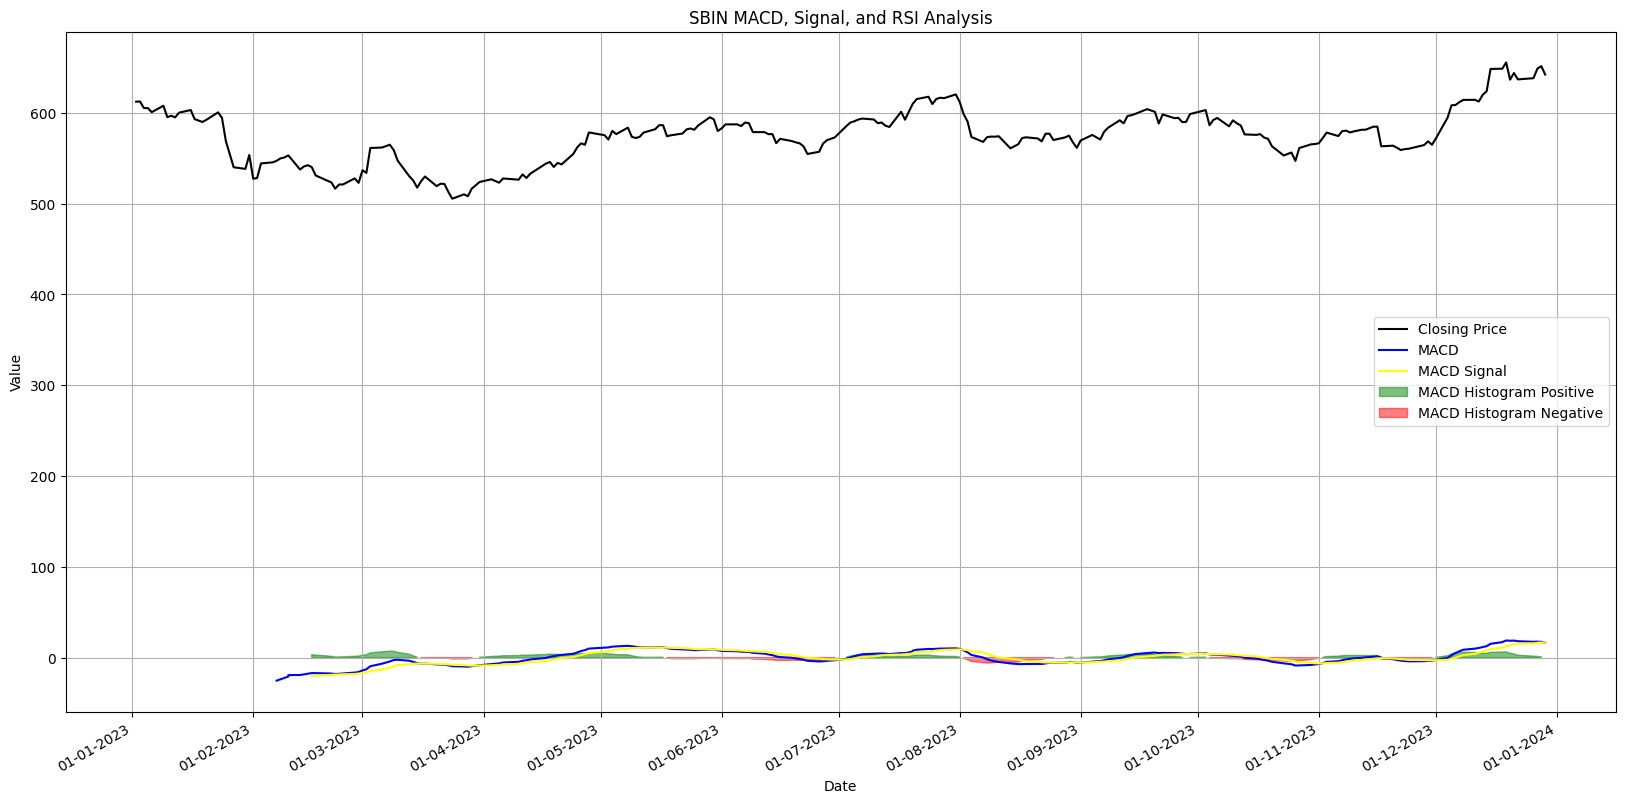

In [ ]:
# Filter the data where MACD is below the Signal line and below the 0-line
import pandas as pd
import nsepython as nse
import pandas_ta as ta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define symbol and series
symbol = input()
series = "EQ"

# Define start date and end date
start_date = input()
end_date = input()

# Fetch equity history
equity_data = nse.equity_history(symbol, series, start_date, end_date)

# Convert data to DataFrame
data = pd.DataFrame(equity_data)
data['mTIMESTAMP'] = pd.to_datetime(data['mTIMESTAMP'])
data = data.sort_values(by='mTIMESTAMP')

# Convert necessary columns to numeric
data['CH_CLOSING_PRICE'] = pd.to_numeric(data['CH_CLOSING_PRICE'], errors='coerce')
data['CH_TOT_TRADED_QTY'] = pd.to_numeric(data['CH_TOT_TRADED_QTY'], errors='coerce')

# Drop rows with NaN values in key columns after conversion
data = data.dropna(subset=['CH_CLOSING_PRICE', 'CH_TOT_TRADED_QTY'])

# Calculate MACD and MACD signal line
macd = ta.macd(data['CH_CLOSING_PRICE'], fast=12, slow=26, signal=9)
data['MACD'] = macd['MACD_12_26_9']
data['Signal'] = macd['MACDs_12_26_9']

# Calculate RSI
data['RSI'] = ta.rsi(data['CH_CLOSING_PRICE'], length=14)

# Calculate the gap between MACD and Signal line
data['MACD_Gap'] = data['MACD'] - data['Signal']
print(data['MACD_Gap'])

# Filter the data where MACD is below the Signal line and below the 0-line
filtered_data = data[(data['MACD'] < data['Signal']) & (data['MACD'] > 0) ]

# Get the required dates and histogram values
required_dates = filtered_data['mTIMESTAMP']
histogram_values = filtered_data['MACD_Gap']

# Save the results to an Excel file
output_file = 'SBIN_MACD_RSI_above0_belowsignal.xlsx'
with pd.ExcelWriter(output_file) as writer:
    data.to_excel(writer, sheet_name='Full Data', index=False)
    filtered_data.to_excel(writer, sheet_name='Filtered Data', index=False)
print(f"Analysis results have been saved to {output_file}")

# Print the dates and histogram values
print("Dates when MACD is below Signal and above 0-line")
print(required_dates)
print("\nHistogram values for those dates:")
print(histogram_values)

# Optionally, plot the data
plt.figure(figsize=(20, 10))
plt.plot(data['mTIMESTAMP'], data['CH_CLOSING_PRICE'], label='Closing Price', color = 'black')
plt.plot(data['mTIMESTAMP'], data['MACD'], label='MACD', color='blue')
plt.plot(data['mTIMESTAMP'], data['Signal'], label='MACD Signal', color='yellow')
plt.fill_between(data['mTIMESTAMP'], data['MACD_Gap'], where=(data['MACD_Gap'] > 0), color='green', alpha=0.5, label='MACD Histogram Positive')
plt.fill_between(data['mTIMESTAMP'], data['MACD_Gap'], where=(data['MACD_Gap'] < 0), color='red', alpha=0.5, label='MACD Histogram Negative')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'{symbol} MACD, Signal, and RSI Analysis')
plt.legend()
plt.grid()

# Formatting date labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.show()
